#### Importing librarires.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Reading and checking info about data.

In [2]:
data=pd.read_csv("D:/Data/Datasets/Ecommerce Customers.csv")

In [3]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
data=data.drop(columns=['Email','Address','Avatar'])

In [7]:
data.skew(axis=0)

Avg. Session Length    -0.032175
Time on App            -0.089121
Time on Website         0.012142
Length of Membership   -0.106608
Yearly Amount Spent     0.034790
dtype: float64

<AxesSubplot:>

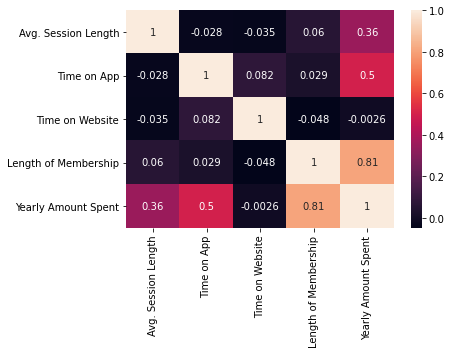

In [8]:
corr_mat=data.corr()
sns.heatmap(corr_mat,annot = True)

#### Checking whether data is normally distributed or not by qq plot.

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab

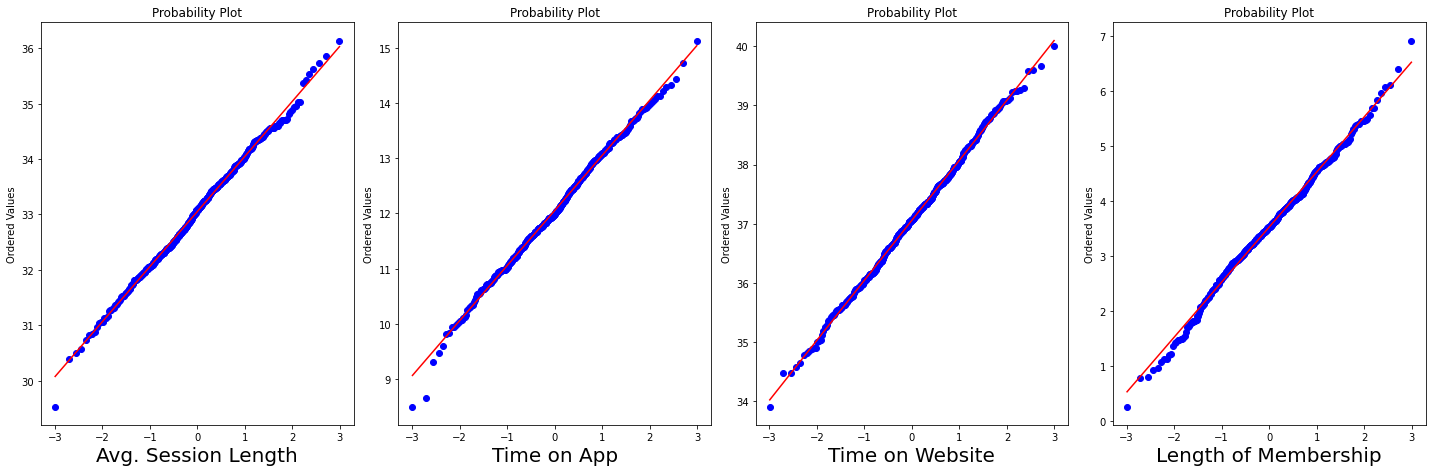

In [10]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=4:
        ax=plt.subplot(4,4,plotnumber)
        st.probplot(data[column],dist='norm',plot=pylab)
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.tight_layout()

#### Feature selection.

In [11]:
y=data['Yearly Amount Spent']
X=data.drop(columns=['Yearly Amount Spent'])

#### Scaling, spliting and fitting linear regression model.

In [12]:
scaler= StandardScaler()
x_scaled = scaler.fit_transform(X)


x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.25,random_state=200)


reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

#### Checking for performance.

In [13]:
reg.score(x_train,y_train)

0.9832613455299134

In [14]:
reg.score(x_test,y_test)

0.9867119074130755

In [15]:
def adj_r2(x,y):
    r2=reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [16]:
adj_r2(x_test,y_test)

0.9862689709935113

In [17]:
y_pred=reg.predict(x_test)

#### Checking for error in our data.

In [18]:
mean_squared_error(y_test,y_pred)

97.20358794330245

In [19]:
mean_absolute_error(y_test, y_pred)

7.554315044224645

In [20]:
mean_absolute_percentage_error(y_test,y_pred)*100

1.5477712071451062

### Model got very good preformance so to check whether model is overfitting or not using lasso, ridge, elsticnet

#### 1) Lasso

In [21]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

C:\Users\harme\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=100000, normalize=True)

In [22]:
alpha = lasscv.alpha_
alpha

0.0032147159022486013

In [23]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0032147159022486013)

In [24]:
lasso_reg.score(x_test, y_test)

0.9867114309573217

#### 2) Ridge

In [25]:
ridgecv = RidgeCV(alphas =(0.003,0.01,0.1),cv=10)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.003, 0.01 , 0.1  ]), cv=10)

In [26]:
ridgecv.alpha_

0.1

In [27]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [28]:
ridge_model.score(x_test, y_test)

0.986708399059923

#### 3) Elasticnet

In [29]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [30]:
elasticCV.alpha_

0.12299957661056886

In [31]:
elasticCV.l1_ratio

0.5

In [32]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.12299957661056886)

In [33]:
elasticnet_reg.score(x_test, y_test)

0.9824764405794025

### Values of lasso, ridge, elasticnet are nearly same as linear regression model. so, this means there is no overfitting and we got ourselves best model. 